# Chapter 10: Forecasting Basics

## Summary

- Active management is forecasting
- The unconditional or naive forecast is the consensus expected return.  The conditional or informed forecast is dependent on the information source.  Historical averages make poor unconditional forecasts
- A basic forecasting formula connects the naive and informed forecast, and handles single and multiple sources of information.
- The refined forecat has the form volatility ⋅ IC ⋅ score
- The forecasts of return have negligible effect on the forecasts of risk



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Basic forecasting formula

$$ \boxed{ E\{\mathbf{r}|\mathbf{g}\} = E\{\mathbf{r}\} + Cov\{\mathbf{r,g}\} \cdot Var^{-1}\{\mathbf{g}\} \cdot (\mathbf{g} - E\{\mathbf{g}\}) } $$

_where_
- 𝐫 = excess return vector (N assets)
- 𝐠 = raw forecast vector (K forecasts)
- $E\{\mathbf{r}\}$ = naive (consensus) forecast
- $E\{\mathbf{g}\}$ = expected forecast
- $E\{\mathbf{r}|\mathbf{g}\}$ = information expected return: the expected return conditional on 𝐠

It relates forecasts that differ from their expected levels to forecasts of returns that differ from their expected levels.

*The refined forecast* is defined as the change in expected return due to observing 𝐠:

$$ \boxed{ \phi \equiv E\{\mathbf{r}|\mathbf{g}\} - E\{\mathbf{r}\} = Cov\{\mathbf{r,g}\} \cdot Var^{-1}\{\mathbf{g}\} \cdot (\mathbf{g} - E\{\mathbf{g}\}) } $$

Which is the exceptional return.  This may include both residual return forecasts and benchmark timing.  Given a benchmark portfolio B the naive (consensus) forecast is

$$ \boxed{  E\{\mathbf{r}\} = \mathbf{\beta} \cdot \mu_{B} }$$

where we define betas relative to the benchmark and $\mu_{B}$ is the consensus expected excess return of the benchmark.

- historical averages returns are a poor alternative to consensus expected returns
- historical average returns have very large sample errors / inappropriate for new or changing stocks

Applied to residual returns $\theta$ we have the result

$$ \boxed{ E\{\mathbf{\theta}\} = 0  } $$



## One Asset & One Forecast (Example)

**Example**
- Forecasting over one quarter
- The Expected excess return over the quarter is $E\{\mathbf{r}\} = 1.5\%$
- Quarterly volatility is 9%
- That is equivalent to an annual expected excess return of 6% and annual volatility of 18%
- 𝐠 = 2.0% (with standard deviation of 4%)

**Note**
- we can write the return we are forecasting as: &emsp; $r = 1.5 + \theta_{1} + \theta_{2} + ⋅ ⋅ ⋅ + \theta_{81}$
- where 1.5 is the certain-expected return and 81 random elements capture the uncertain component of the return
- θᵢ are independent and equally likely to be +1 / -1 (so each θᵢ has mean 0 and variance 1)
- variance of r is 81 (9% per quarter)

**Additionally**
- We can write $\mathbf{g} = 2.0 + \theta_{1} + \theta_{2} + \theta_{3} + \eta_{1} + \eta_{2} + ⋅ ⋅ ⋅ + \eta_{13}$
- $\theta_{1}, \theta_{2},\theta_{3}$ are the elements of the return 𝐫
- components $\eta_{1} + \eta_{2} + ⋅ ⋅ ⋅ + \eta_{13}$ are the additional bundles of uncertainty in the forecast (16 units of information 3 are signal and 13 are noise)
- The co-variance of 𝐫 and 𝐠 is the number if elements of return they have in common - giving
$$IC = Corr\{r,g\} = \frac{Cov\{r,g\}}{Std\{r\} \cdot {Std\{g\}}} = \frac{3}{9 \cdot 4} = 0.0833$$

For the single asset / single forecast this is

$$ \boxed{ \phi = Std\{r\} \cdot Corr\{r,g\} \cdot \left(\frac{g - E\{g\}}{Std\{g\}}\right) } $$

in this specific case is

$$ \phi = 9 \cdot 0.0833 \cdot \left(\frac{g-2}{4}\right)$$



In [2]:
E_r = 1.5
std_r = 9
E_g = 2
std_g = 4

cov_r_g = 3 # 3 pieces of information in common (θ₁,θ₂,θ₃)

corr_r_g =  cov_r_g/(std_r*std_g)
print(f'Information coefficient is: {corr_r_g:.4f}')
#forecast = std_r * corr_r_g * (g-E_g)/std_g

Information coefficient is: 0.0833


## Forecasting Rule of Thumb

- refine the forecast by standardising the raw forecast by subtracting the expected forecast and dividing by the standard deviation (eg _z score_)
- scale the score to account for the skill of the forecaster (the IC) and the volatility of the return we are attempting to forecast

$$ \boxed{ Refined  Forecast = volatility \cdot IC \cdot score } $$

For the earlier example we have refined forecast: &emsp; $ 0.75 = 0.0833 \cdot 9$ times the score



## One Asset and two forecasts

Generalising the one asset - one forecast from above

Assume second forecast: &emsp;  $\mathbf{g'} = 0.5 + \theta_{3} + \theta_{4} + \theta_{5} + \theta_{6} + \eta_{10} + \eta_{11} + ⋅ ⋅ ⋅ + \eta_{30}$

The forecasts $\mathbf{g}$ and $\mathbf{g'}$ share one element of signal ($\theta_{3}$) and four elements of noise ($\eta_{10}, \eta_{11}, \eta_{12}, \eta_{13}$)

- Forecast $\mathbf{g'}$ has 25 units of uncertainty thus: &emsp; $Var\{g'\} = 25$
- Forecast $\mathbf{g'}$ has 4 elements of signal thus: &emsp; $Cov\{r,g'\} = 4$
- The correlation of $\mathbf{r}$ and $\mathbf{g'}$ ($IC_{g'}$) is: &emsp; $Corr\{r,g'\} = \frac{4}{9 \cdot 5} = 0.089$
- Forecast $\mathbf{g'}$ has five bits of information in common with forecast $\mathbf{g}$ $(\theta_{3}, \eta_{10}, \eta_{11}, \eta_{12}, \eta_{13}$) so: &emsp; $Corr\{g,g'\} = 5$


Using only $\mathbf{g'}$

- $ \phi = 9 \cdot 0.0889 \cdot (\frac{g'-5}{5})$

combining  $\mathbf{g}$ and  $\mathbf{g'}$ we have

- $ \phi = 0.1467 \cdot (g-2) + 0.1307 \cdot  (g'-0.5)$



<br/>
A general result combining the two forecast case where there is a correlation between the forecasts is:

$$ \boxed{ IC\_{combined} = \sqrt{ \frac{IC_{g}^{2} + IC_{g'}^{2} -2 \cdot \rho_{g,g'} \cdot IC_{g} \cdot IC_{g'}  }{1 - \rho_{g,g'}^{2}} } } $$



## In absence of a good IC forecast

When you don't have sufficient information for IC of raw forecasts - following is good rule of thumb:

| Ability of Forecaster      | IC     |
|----------------------------|--------|
| Worthless / No Information | 0.00   |
| Good                       | 0.05   |
| Great                      | 0.10   |
| World Class                | 0.15   |
| Faulty backtest!           | > 0.20 |





## Types of Forecasts ##

- Tips
- Up/Down Forecast
- Buy & Sell Recommendations (lists)
- Fractiles (partitions of buy / sell recommendations)
- Rankings


## Forecasting & Risk

**Volatility in forecast** _Related by below graph_

$$ \boxed{ \sigma_{post} = \sigma_{prior} \cdot \sqrt{ 1 - IC^{2} } } $$


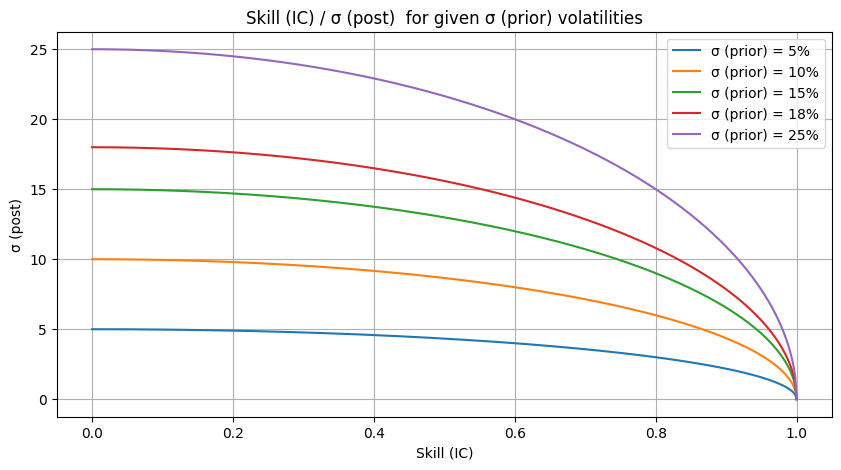

In [3]:
def sigma_for_ic(sigma_prior, ic):
     return sigma_prior * np.sqrt(1 - ic**2)

ic_levels = np.linspace(0.0, 1, 500)
sigma_prior_levels = [5, 10, 15, 18, 25]

plt.subplots(figsize=(10, 5))
for sig_prior in sigma_prior_levels:
    plt.plot(ic_levels, sigma_for_ic(sig_prior,  ic_levels), label=f'σ (prior) = {sig_prior}%')

plt.grid(True)
plt.title("Skill (IC) / σ (post)  for given σ (prior) volatilities")
plt.xlabel("Skill (IC)")
plt.ylabel("σ (post)")
plt.legend(loc='upper right')
plt.show()

## Advanced Forecasting Techniques

- Time Series Analysis (e.g. Autoregressive, Moving Average, ARMA, ARIMA, VARMA)
- ARCH / GARCH (Generalised Autoregressive conditional heteroskedasticity)
- Kalman Filters
- Chaos Theory
- Neural Nets / Machine Learning
- Genetic Algorithms



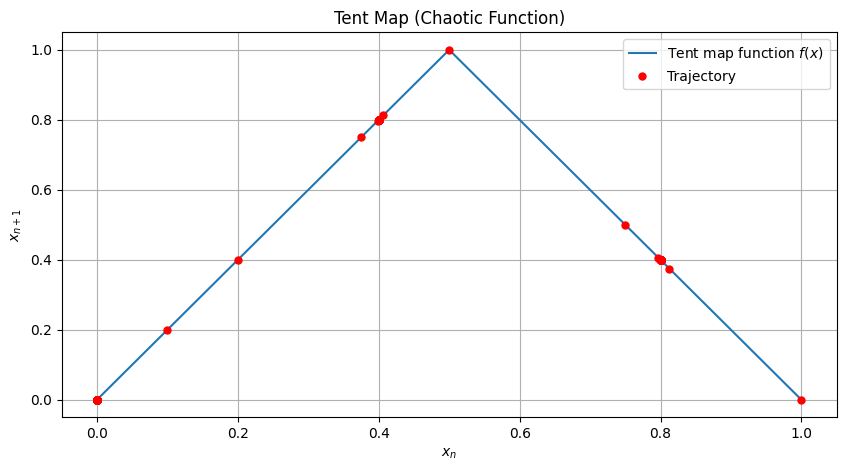

In [4]:
# tent map (Chaos Theory) example - just for fun
# See: https://en.wikipedia.org/wiki/Tent_map

def tent_map(x, mu=1):
    if x < 0.5:
        return mu * x * 2
    else:
        return mu * (1 - x) * 2

# Parameters
mu = 1.0 # Control parameter
iterations = 10_000
initial_value = 0.1

# Generate the trajectory
trajectory = [initial_value]
for _ in range(iterations - 1):
    trajectory.append(tent_map(trajectory[-1], mu))

x = np.linspace(0, 1, 500)
y = [tent_map(val, mu) for val in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Tent map function $f(x)$")
plt.plot(trajectory[:-1], trajectory[1:], 'o', color='red', markersize=5, label="Trajectory")
plt.title("Tent Map (Chaotic Function)")
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.legend()
plt.grid()
plt.show()